In [14]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sqlalchemy import and_


In [15]:
 # Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func,inspect
import datetime as dt


In [16]:
engine = create_engine("sqlite:///../homework/resources/hawaii.sqlite",connect_args={'check_same_thread': False})
#C:/Users/rohit/LearnPython/MySQL/homework

In [17]:
# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(engine, reflect=True)

In [18]:
 # We can view all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [19]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [20]:
 # Create our session (link) from Python to the DB
session = Session(engine)

In [9]:
engine.execute("select * from Station  desc Limit 10 ").fetchall()

[(1, 'USC00519397', 'WAIKIKI 717.2, HI US', 21.2716, -157.8168, 3.0),
 (2, 'USC00513117', 'KANEOHE 838.1, HI US', 21.4234, -157.8015, 14.6),
 (3, 'USC00514830', 'KUALOA RANCH HEADQUARTERS 886.9, HI US', 21.5213, -157.8374, 7.0),
 (4, 'USC00517948', 'PEARL CITY, HI US', 21.3934, -157.9751, 11.9),
 (5, 'USC00518838', 'UPPER WAHIAWA 874.3, HI US', 21.4992, -158.0111, 306.6),
 (6, 'USC00519523', 'WAIMANALO EXPERIMENTAL FARM, HI US', 21.33556, -157.71139, 19.5),
 (7, 'USC00519281', 'WAIHEE 837.5, HI US', 21.45167, -157.84888999999998, 32.9),
 (8, 'USC00511918', 'HONOLULU OBSERVATORY 702.2, HI US', 21.3152, -157.9992, 0.9),
 (9, 'USC00516128', 'MANOA LYON ARBO 785.2, HI US', 21.3331, -157.8025, 152.4)]

In [54]:
inspector = inspect(engine)
inspector.get_columns('Station')

[{'name': 'id',
  'type': INTEGER(),
  'nullable': False,
  'default': None,
  'autoincrement': 'auto',
  'primary_key': 1},
 {'name': 'station',
  'type': TEXT(),
  'nullable': True,
  'default': None,
  'autoincrement': 'auto',
  'primary_key': 0},
 {'name': 'name',
  'type': TEXT(),
  'nullable': True,
  'default': None,
  'autoincrement': 'auto',
  'primary_key': 0},
 {'name': 'latitude',
  'type': FLOAT(),
  'nullable': True,
  'default': None,
  'autoincrement': 'auto',
  'primary_key': 0},
 {'name': 'longitude',
  'type': FLOAT(),
  'nullable': True,
  'default': None,
  'autoincrement': 'auto',
  'primary_key': 0},
 {'name': 'elevation',
  'type': FLOAT(),
  'nullable': True,
  'default': None,
  'autoincrement': 'auto',
  'primary_key': 0}]

In [55]:
engine.execute("select * from Measurement order by date desc   Limit 10  ").fetchall()

[(2724, 'USC00519397', '2017-08-23', 0.0, 81.0),
 (7635, 'USC00514830', '2017-08-23', 0.0, 82.0),
 (12187, 'USC00519523', '2017-08-23', 0.08, 82.0),
 (19550, 'USC00516128', '2017-08-23', 0.45, 76.0),
 (2723, 'USC00519397', '2017-08-22', 0.0, 82.0),
 (12186, 'USC00519523', '2017-08-22', 0.0, 82.0),
 (19549, 'USC00516128', '2017-08-22', 0.5, 76.0),
 (2722, 'USC00519397', '2017-08-21', 0.0, 81.0),
 (7634, 'USC00514830', '2017-08-21', 0.02, 79.0),
 (12185, 'USC00519523', '2017-08-21', None, 82.0)]

In [56]:
# Precipitation Data retrival from SQL Alchemy

from sqlalchemy import and_
query_end_date = dt.date(2017,8,23)
query_start_date = query_end_date  - dt.timedelta(days=365)
prcp_data = session.query(Measurement.date, Measurement.prcp).\
      filter(and_(Measurement.date > query_start_date, Measurement.date < query_end_date)).all()
   

In [57]:
#Making a data frame of queried data

df = pd.DataFrame(prcp_data, columns=['date','prcp'])
df.set_index('date')
summary_df=df.sort_values(by=["date"],ascending=False)

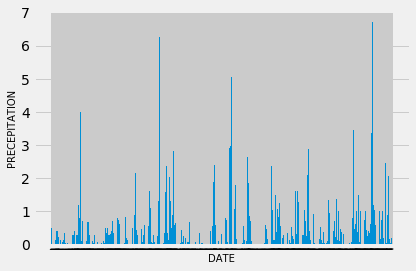

None


In [59]:
def plot_bar_x():
    # this is for plotting purpose
    plt.bar(summary_df['date'],summary_df['prcp'] )
    plt.xlabel('DATE', fontsize=10)
    plt.ylabel('PRECEPITATION', fontsize=10)
    plt.xticks(summary_df['date'], summary_df['prcp'], fontsize=2, rotation=10)
    plt.show()

print(plot_bar_x())

In [58]:
#Summary of the data 
summary_df.describe()

,prcp
count,2011.000000
mean,0.176549
std,0.460667
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


In [60]:
#query to calculate the total number of stations.
station_count = session.query(Station).count()
print(f"Station count : {station_count}")

Station count : 9


In [61]:
#ordered data of Station & Observations
ordered_count = session.query(Measurement.station,Measurement.tobs).order_by(Measurement.station,Measurement.tobs).all()
for record in ordered_count :
    print(f"Station: {record[0]} , Observations: {record[1]}")
    

Station: USC00511918 , Observations: 53.0
Station: USC00511918 , Observations: 55.0
Station: USC00511918 , Observations: 56.0
Station: USC00511918 , Observations: 56.0
Station: USC00511918 , Observations: 56.0
Station: USC00511918 , Observations: 56.0
Station: USC00511918 , Observations: 56.0
Station: USC00511918 , Observations: 57.0
Station: USC00511918 , Observations: 57.0
Station: USC00511918 , Observations: 57.0
Station: USC00511918 , Observations: 57.0
Station: USC00511918 , Observations: 57.0
Station: USC00511918 , Observations: 57.0
Station: USC00511918 , Observations: 57.0
Station: USC00511918 , Observations: 57.0
Station: USC00511918 , Observations: 57.0
Station: USC00511918 , Observations: 57.0
Station: USC00511918 , Observations: 57.0
Station: USC00511918 , Observations: 58.0
Station: USC00511918 , Observations: 58.0
Station: USC00511918 , Observations: 58.0
Station: USC00511918 , Observations: 58.0
Station: USC00511918 , Observations: 58.0
Station: USC00511918 , Observation

Station: USC00513117 , Observations: 66.0
Station: USC00513117 , Observations: 66.0
Station: USC00513117 , Observations: 66.0
Station: USC00513117 , Observations: 66.0
Station: USC00513117 , Observations: 66.0
Station: USC00513117 , Observations: 66.0
Station: USC00513117 , Observations: 66.0
Station: USC00513117 , Observations: 66.0
Station: USC00513117 , Observations: 66.0
Station: USC00513117 , Observations: 66.0
Station: USC00513117 , Observations: 66.0
Station: USC00513117 , Observations: 66.0
Station: USC00513117 , Observations: 66.0
Station: USC00513117 , Observations: 66.0
Station: USC00513117 , Observations: 66.0
Station: USC00513117 , Observations: 66.0
Station: USC00513117 , Observations: 66.0
Station: USC00513117 , Observations: 66.0
Station: USC00513117 , Observations: 66.0
Station: USC00513117 , Observations: 66.0
Station: USC00513117 , Observations: 66.0
Station: USC00513117 , Observations: 66.0
Station: USC00513117 , Observations: 66.0
Station: USC00513117 , Observation

Station: USC00513117 , Observations: 75.0
Station: USC00513117 , Observations: 76.0
Station: USC00513117 , Observations: 76.0
Station: USC00513117 , Observations: 76.0
Station: USC00513117 , Observations: 76.0
Station: USC00513117 , Observations: 76.0
Station: USC00513117 , Observations: 76.0
Station: USC00513117 , Observations: 76.0
Station: USC00513117 , Observations: 76.0
Station: USC00513117 , Observations: 76.0
Station: USC00513117 , Observations: 76.0
Station: USC00513117 , Observations: 76.0
Station: USC00513117 , Observations: 76.0
Station: USC00513117 , Observations: 76.0
Station: USC00513117 , Observations: 76.0
Station: USC00513117 , Observations: 76.0
Station: USC00513117 , Observations: 76.0
Station: USC00513117 , Observations: 76.0
Station: USC00513117 , Observations: 76.0
Station: USC00513117 , Observations: 76.0
Station: USC00513117 , Observations: 76.0
Station: USC00513117 , Observations: 76.0
Station: USC00513117 , Observations: 76.0
Station: USC00513117 , Observation

Station: USC00514830 , Observations: 76.0
Station: USC00514830 , Observations: 76.0
Station: USC00514830 , Observations: 76.0
Station: USC00514830 , Observations: 76.0
Station: USC00514830 , Observations: 76.0
Station: USC00514830 , Observations: 76.0
Station: USC00514830 , Observations: 76.0
Station: USC00514830 , Observations: 76.0
Station: USC00514830 , Observations: 76.0
Station: USC00514830 , Observations: 76.0
Station: USC00514830 , Observations: 76.0
Station: USC00514830 , Observations: 76.0
Station: USC00514830 , Observations: 76.0
Station: USC00514830 , Observations: 76.0
Station: USC00514830 , Observations: 77.0
Station: USC00514830 , Observations: 77.0
Station: USC00514830 , Observations: 77.0
Station: USC00514830 , Observations: 77.0
Station: USC00514830 , Observations: 77.0
Station: USC00514830 , Observations: 77.0
Station: USC00514830 , Observations: 77.0
Station: USC00514830 , Observations: 77.0
Station: USC00514830 , Observations: 77.0
Station: USC00514830 , Observation

Station: USC00516128 , Observations: 71.0
Station: USC00516128 , Observations: 71.0
Station: USC00516128 , Observations: 71.0
Station: USC00516128 , Observations: 71.0
Station: USC00516128 , Observations: 71.0
Station: USC00516128 , Observations: 71.0
Station: USC00516128 , Observations: 71.0
Station: USC00516128 , Observations: 71.0
Station: USC00516128 , Observations: 71.0
Station: USC00516128 , Observations: 71.0
Station: USC00516128 , Observations: 71.0
Station: USC00516128 , Observations: 71.0
Station: USC00516128 , Observations: 71.0
Station: USC00516128 , Observations: 71.0
Station: USC00516128 , Observations: 71.0
Station: USC00516128 , Observations: 71.0
Station: USC00516128 , Observations: 71.0
Station: USC00516128 , Observations: 71.0
Station: USC00516128 , Observations: 71.0
Station: USC00516128 , Observations: 71.0
Station: USC00516128 , Observations: 71.0
Station: USC00516128 , Observations: 71.0
Station: USC00516128 , Observations: 71.0
Station: USC00516128 , Observation

Station: USC00517948 , Observations: 74.0
Station: USC00517948 , Observations: 74.0
Station: USC00517948 , Observations: 74.0
Station: USC00517948 , Observations: 74.0
Station: USC00517948 , Observations: 75.0
Station: USC00517948 , Observations: 75.0
Station: USC00517948 , Observations: 75.0
Station: USC00517948 , Observations: 75.0
Station: USC00517948 , Observations: 75.0
Station: USC00517948 , Observations: 75.0
Station: USC00517948 , Observations: 75.0
Station: USC00517948 , Observations: 75.0
Station: USC00517948 , Observations: 75.0
Station: USC00517948 , Observations: 75.0
Station: USC00517948 , Observations: 75.0
Station: USC00517948 , Observations: 75.0
Station: USC00517948 , Observations: 75.0
Station: USC00517948 , Observations: 75.0
Station: USC00517948 , Observations: 75.0
Station: USC00517948 , Observations: 75.0
Station: USC00517948 , Observations: 75.0
Station: USC00517948 , Observations: 75.0
Station: USC00517948 , Observations: 75.0
Station: USC00517948 , Observation

Station: USC00519281 , Observations: 69.0
Station: USC00519281 , Observations: 69.0
Station: USC00519281 , Observations: 69.0
Station: USC00519281 , Observations: 69.0
Station: USC00519281 , Observations: 69.0
Station: USC00519281 , Observations: 69.0
Station: USC00519281 , Observations: 69.0
Station: USC00519281 , Observations: 69.0
Station: USC00519281 , Observations: 69.0
Station: USC00519281 , Observations: 69.0
Station: USC00519281 , Observations: 69.0
Station: USC00519281 , Observations: 69.0
Station: USC00519281 , Observations: 69.0
Station: USC00519281 , Observations: 69.0
Station: USC00519281 , Observations: 69.0
Station: USC00519281 , Observations: 69.0
Station: USC00519281 , Observations: 69.0
Station: USC00519281 , Observations: 69.0
Station: USC00519281 , Observations: 69.0
Station: USC00519281 , Observations: 69.0
Station: USC00519281 , Observations: 69.0
Station: USC00519281 , Observations: 69.0
Station: USC00519281 , Observations: 69.0
Station: USC00519281 , Observation

Station: USC00519281 , Observations: 80.0
Station: USC00519281 , Observations: 80.0
Station: USC00519281 , Observations: 80.0
Station: USC00519281 , Observations: 80.0
Station: USC00519281 , Observations: 80.0
Station: USC00519281 , Observations: 80.0
Station: USC00519281 , Observations: 80.0
Station: USC00519281 , Observations: 80.0
Station: USC00519281 , Observations: 80.0
Station: USC00519281 , Observations: 80.0
Station: USC00519281 , Observations: 80.0
Station: USC00519281 , Observations: 80.0
Station: USC00519281 , Observations: 80.0
Station: USC00519281 , Observations: 80.0
Station: USC00519281 , Observations: 80.0
Station: USC00519281 , Observations: 80.0
Station: USC00519281 , Observations: 80.0
Station: USC00519281 , Observations: 80.0
Station: USC00519281 , Observations: 80.0
Station: USC00519281 , Observations: 80.0
Station: USC00519281 , Observations: 80.0
Station: USC00519281 , Observations: 80.0
Station: USC00519281 , Observations: 80.0
Station: USC00519281 , Observation

Station: USC00519397 , Observations: 78.0
Station: USC00519397 , Observations: 78.0
Station: USC00519397 , Observations: 78.0
Station: USC00519397 , Observations: 78.0
Station: USC00519397 , Observations: 78.0
Station: USC00519397 , Observations: 78.0
Station: USC00519397 , Observations: 78.0
Station: USC00519397 , Observations: 78.0
Station: USC00519397 , Observations: 78.0
Station: USC00519397 , Observations: 78.0
Station: USC00519397 , Observations: 78.0
Station: USC00519397 , Observations: 78.0
Station: USC00519397 , Observations: 78.0
Station: USC00519397 , Observations: 78.0
Station: USC00519397 , Observations: 78.0
Station: USC00519397 , Observations: 78.0
Station: USC00519397 , Observations: 78.0
Station: USC00519397 , Observations: 78.0
Station: USC00519397 , Observations: 78.0
Station: USC00519397 , Observations: 78.0
Station: USC00519397 , Observations: 78.0
Station: USC00519397 , Observations: 78.0
Station: USC00519397 , Observations: 78.0
Station: USC00519397 , Observation

Station: USC00519523 , Observations: 75.0
Station: USC00519523 , Observations: 75.0
Station: USC00519523 , Observations: 75.0
Station: USC00519523 , Observations: 75.0
Station: USC00519523 , Observations: 75.0
Station: USC00519523 , Observations: 75.0
Station: USC00519523 , Observations: 75.0
Station: USC00519523 , Observations: 75.0
Station: USC00519523 , Observations: 75.0
Station: USC00519523 , Observations: 75.0
Station: USC00519523 , Observations: 75.0
Station: USC00519523 , Observations: 75.0
Station: USC00519523 , Observations: 75.0
Station: USC00519523 , Observations: 75.0
Station: USC00519523 , Observations: 75.0
Station: USC00519523 , Observations: 75.0
Station: USC00519523 , Observations: 75.0
Station: USC00519523 , Observations: 75.0
Station: USC00519523 , Observations: 75.0
Station: USC00519523 , Observations: 75.0
Station: USC00519523 , Observations: 75.0
Station: USC00519523 , Observations: 75.0
Station: USC00519523 , Observations: 75.0
Station: USC00519523 , Observation

In [62]:
#Station with highest count of Observations

max_observation_fun = session.query(Measurement.station,func.max(Measurement.tobs)).all()
print(f"Station with max observations is : {max_observation_fun[0][0]} and Observation count: {max_observation_fun[0][1]}")

#abc=engine.execute("select station,max(tobs) from Measurement").fetchall()
#abc


Station with max observations is : USC00519397 and Observation count: 87.0


In [63]:
query_end_date1 = dt.date(2017,8,23)
query_start_date1 = query_end_date1  - dt.timedelta(days=365)

obs_data = session.query(Measurement.tobs).\
      filter(and_(Measurement.date > query_start_date1, Measurement.date < query_end_date1)).\
      filter(Measurement.station=="USC00519397").\
      order_by(Measurement.tobs.desc()).all()

In [64]:
obs_df = pd.DataFrame(obs_data, columns=['tobs'])

In [65]:
obs_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 359 entries, 0 to 358
Data columns (total 1 columns):
tobs    359 non-null float64
dtypes: float64(1)
memory usage: 2.9 KB


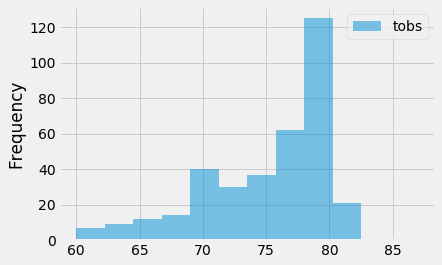

In [66]:
ax = obs_df.plot.hist(bins=12, alpha=0.5)

In [21]:
from flask import Flask, jsonify
from flask import request ,render_template

# 2. Create an app, being sure to pass __name__
app = Flask(__name__)

 

# 3. Define what to do when a user hits the index route
@app.route("/")
def home():
    message = "Hello, World"
    return ("<!DOCTYPE html>"
"<body>"
     "<h1><strong>Hello World</strong></h1>"
    "</nav>"
      "<h1>Welcome to my API Page</h1>"
    "</header>"
    "<main>"
   "<h3>Some Helpful APIs :</h3>"
 "<ul>"
   "<li><a href='http://127.0.0.1:5000/api/v1.0/precipitation' target='_blank'>/api/v1.0/precipitation</a></li>"
   "<li>-------------------------------------------------------------------------------------------------</li><br>"
   "<li><a href='http://127.0.0.1:5000/api/v1.0/stations' target='_blank'>/api/v1.0/stations</a></li>"
   "<li>-------------------------------------------------------------------------------------------------</li><br>"
   "<li><a href='http://127.0.0.1:5000/api/v1.0/tobs' target='_blank'>/api/v1.0/tobs</a></li>"
   "<li>-------------------------------------------------------------------------------------------------</li><br>"
   "<li><a href='http://127.0.0.1:5000/api/v1.0/<start>' target='_blank'>/api/v1.0/startdate</a></li>"
   "<li>-------------------------------------------------------------------------------------------------</li><br>"
   "<li><a href='http://127.0.0.1:5000/api/v1.0/<start>/<end>' target='_blank'>/api/v1.0/startdate/enddate</a></li>"
   "(startdate and enddate should be in yyyy-mm-dd format)"
   "<br><li>-------------------------------------------------------------------------------------------------</li>"
    "<li><a href='http://127.0.0.1:5000/shutdown' target='_blank'>STOP THE SERVER</a></li><br>"
   "<li>-------------------------------------------------------------------------------------------------</li><br><br>"
   "<li>More links are coming soon ....Hang on </li>"
 "</ul><br></br>"
    "</main></div>"
  "</body></html>")

#----------------------------------------------------------------------------------------------------------------------

# Logic to Retrive precipitation data with date details

#--------------------------------------------------------------------------------------------------------------------

def perc_data():
    query_end_date = dt.date(2017,8,23)
    query_start_date = query_end_date  - dt.timedelta(days=365)
    return session.query(Measurement.date, Measurement.prcp).\
      filter(and_(Measurement.date > query_start_date, Measurement.date < query_end_date)).all()

@app.route("/api/v1.0/precipitation")
def prcp():
    try:
        
        data_dct = dict(perc_data())
        return jsonify(data_dct)

    except:
        return ("<h1>oops,its not you its us ...Please try again later<h1>")

#----------------------------------------------------------------------------------------------------------------------

# Logic to Retrive list of unique Stations

#--------------------------------------------------------------------------------------------------------------------

def stat_list():
    print("control entered into function")
    return session.query(Station.station).distinct().all()


@app.route("/api/v1.0/stations")
def stations():
    try:
        
       
        sta_dict = {}
        a=0
        station_list = stat_list()
        for record in station_list :
            #print(f"value of a:{a}")
            key = "stations"
            sta_dict.setdefault(key,[])
            sta_dict[key].append(record[0])
            a=a+1
            if a >= len(station_list):
                break


        data_dct= dict(sta_dict)

        return jsonify(data_dct)
        

    except:
        return ("<h1>oops,its not you its us ...Please try again later<h1>")
#-------------------------------------------------------------------------------------------------------------------   
    
#Temperature Observations logic - date wise for last one year
#---------------------------------------------------------------------------------------------------------------------------

def temp_obs():
    #List of tobs for last 365 days and filter data only for previous year. 
    year_str = "2016"
    query_end_date = dt.date(2017,8,23)
    query_start_date = query_end_date  - dt.timedelta(days=365)
    print(query_start_date)
    return session.query(Measurement.date,Measurement.tobs).\
      filter(and_(Measurement.date > query_start_date, Measurement.date < query_end_date)).\
      filter(func.strftime("%Y", Measurement.date) == year_str).all()




@app.route("/api/v1.0/tobs")
def tobs():
    try:
        data_dct= dict(temp_obs())
        return jsonify(data_dct)

    except:
        return ("<h1>oops,its not you its us ...Please try again later<h1>")
    
#-------------------------------------------------------------------------------------------------------------------   
    
#Endpoint logic to get MIN , MAX and AVG greater than provided date 
#---------------------------------------------------------------------------------------------------------------------------

def start_(date_limit):
    try:
        print("control entered into method")
        return session.query(func.min(Measurement.tobs),func.max(Measurement.tobs),func.avg(Measurement.tobs)).\
        filter(Measurement.date > date_limit  ).all()
    except:
         return ("<h1>oops,its not you its us ...Please try again later<h1>")

@app.route("/api/v1.0/<start>")
def start_date(start):
    try:
        start_date = str(start).replace("-",",")
        if len(start) <= 10 : 
            print("control entered if block")
            date_split=start_date.split(",")
            real_date = dt.date(int(date_split[0]),int(date_split[1]),int(date_split[2]))
            print(real_date)
        else :
            print("control entered else block")
            if endswith(" "):
                print("ending with white space")
            real_date="2012-11-04"

        x=start_(real_date)
        temp_dist= {"min_temp":x[0][0],"max_temp":x[0][1],"avg_temp":x[0][2]}
        return jsonify(temp_dist)
    except :
        return ("<h1>oops,its not you its us ...Please try again later<h1>")

    
#-------------------------------------------------------------------------------------------------------------------   
    
#Endpoint logic to get MIN , MAX and AVG Temperatures between two specificed dates
#---------------------------------------------------------------------------------------------------------------------------

def start_end_(start_date, end_date):
    print("control entered into method")
    return session.query(func.min(Measurement.tobs),func.max(Measurement.tobs),func.avg(Measurement.tobs)).\
           filter(and_(Measurement.date > start_date , Measurement.date < end_date)).all()
    
@app.route("/api/v1.0/<start>/<end>")
def end_date(start, end):
    try:
        start_date = str(start).replace("-",",")
        if len(start_date) <= 10 : 
            print("control entered start date if block")
            date_split=start_date.split(",")
            real_start_date = dt.date(int(date_split[0]),int(date_split[1]),int(date_split[2]))
            print(real_start_date)
        else :
            print("control entered else block")
            if endswith(" "):
                print("ending with white space")
            real_start_date="2012-11-04"

        end_date = str(end).replace("-",",")
        if len(end_date) <= 10 : 
            print("control entered end date if block")
            date_split1=end_date.split(",")
            real_end_date = dt.date(int(date_split1[0]),int(date_split1[1]),int(date_split1[2]))
            print(real_end_date)
        else :
            print("control entered else block")
            if endswith(" "):
                print("ending with white space")
            real_end_date=dt.todaydate()


        x=start_end_(real_start_date,real_end_date)
        temp_dist= {"min_temp":x[0][0],"max_temp":x[0][1],"avg_temp":x[0][2]}
        return jsonify(temp_dist)
    except :
        return ("<h1>oops,its not you its us ...Please try again later<h1>")
   
    
    
    
    
    
    
    
    
    
#-------------------------------------------------------------------------------------------------------------------   
    
#End Point to Shut down server
    
#---------------------------------------------------------------------------------------------------------------------------

def shutdown_server():
    func = request.environ.get('werkzeug.server.shutdown')
    if func is None:
        raise RuntimeError('Not running with the Werkzeug Server')
    func()

@app.route('/shutdown')
def shutdown():
    shutdown_server()
    return ("<h1><strong>You requested to shut down the server .....So SHUTTING SERVER DOWN!!!</strong></h1>")

if __name__ == "__main__":
    app.run(debug=False)


 * Serving Flask app "__main__" (lazy loading)
 * Environment: production
   Use a production WSGI server instead.
 * Debug mode: off


 * Running on http://127.0.0.1:5000/ (Press CTRL+C to quit)
127.0.0.1 - - [29/Apr/2019 19:17:04] "GET / HTTP/1.1" 200 -
127.0.0.1 - - [29/Apr/2019 19:17:07] "GET /api/v1.0/precipitation HTTP/1.1" 200 -
127.0.0.1 - - [29/Apr/2019 19:17:12] "GET /api/v1.0/precipitation HTTP/1.1" 200 -
127.0.0.1 - - [29/Apr/2019 19:17:26] "GET /api/v1.0/tobs HTTP/1.1" 200 -


2016-08-23


127.0.0.1 - - [29/Apr/2019 19:17:33] "GET /api/v1.0/tobs HTTP/1.1" 200 -


2016-08-23


127.0.0.1 - - [29/Apr/2019 19:17:35] "GET /api/v1.0/tobs HTTP/1.1" 200 -


2016-08-23


127.0.0.1 - - [29/Apr/2019 19:18:27] "GET /api/v1.0/2011-12-09 HTTP/1.1" 200 -


control entered if block
2011-12-09
control entered into method


127.0.0.1 - - [29/Apr/2019 19:18:32] "GET /api/v1.0/2013-12-09 HTTP/1.1" 200 -


control entered if block
2013-12-09
control entered into method


127.0.0.1 - - [29/Apr/2019 19:18:46] "GET /api/v1.0/2013-12-09/2016-10-03 HTTP/1.1" 200 -


control entered start date if block
2013-12-09
control entered end date if block
2016-10-03
control entered into method


127.0.0.1 - - [29/Apr/2019 19:18:57] "GET /api/v1.0/2013-12-09/2016-10-03 HTTP/1.1" 200 -


control entered start date if block
2013-12-09
control entered end date if block
2016-10-03
control entered into method


127.0.0.1 - - [29/Apr/2019 19:19:02] "GET /api/v1.0/2013-12-09/2017-10-03 HTTP/1.1" 200 -


control entered start date if block
2013-12-09
control entered end date if block
2017-10-03
control entered into method


127.0.0.1 - - [29/Apr/2019 19:19:20] "GET /shutdown HTTP/1.1" 200 -
